# Тестовое задание

Настройка ноубука

In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
TabularPS_path = 'train.csv'
tabular_data = pd.read_csv(TabularPS_path)
tabular_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


In [4]:
tabular_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [5]:
tabular_data['Cabin'] = tabular_data['Cabin'].fillna('NS')
tabular_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NS,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NS,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NS,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NS,S


# Заполнение пропущенных значений в поле "Возраст"

Заполним возраст средним значением в зависимости от пола и класса

Определим средний возраст для мужчин в 1,2,3 классах

In [6]:
mean_1Class = tabular_data[(tabular_data["Pclass"] == 1) & (tabular_data["Sex"] == 'male')].Age.mean()
mean_2Class = tabular_data[(tabular_data["Pclass"] == 2) & (tabular_data["Sex"] == 'male')].Age.mean()
mean_3Class = tabular_data[(tabular_data["Pclass"] == 3) & (tabular_data["Sex"] == 'male')].Age.mean()

mean_1Class = int(mean_1Class)
mean_2Class = int(mean_2Class)
mean_3Class = int(mean_3Class)


In [7]:
print(mean_1Class)
print(mean_2Class)
print(mean_3Class)

42
37
34


In [8]:
tabular_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NS,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NS,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NS,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NS,S


In [9]:
tabular_data.loc[((tabular_data["Pclass"] == 1) & (tabular_data["Sex"] == 'male'))] = tabular_data.loc[((tabular_data["Pclass"] == 1) & (tabular_data["Sex"] == 'male'))].fillna(mean_1Class)
tabular_data.loc[((tabular_data["Pclass"] == 2) & (tabular_data["Sex"] == 'male'))] = tabular_data.loc[((tabular_data["Pclass"] == 2) & (tabular_data["Sex"] == 'male'))].fillna(mean_2Class)
tabular_data.loc[((tabular_data["Pclass"] == 3) & (tabular_data["Sex"] == 'male'))] = tabular_data.loc[((tabular_data["Pclass"] == 3) & (tabular_data["Sex"] == 'male'))].fillna(mean_3Class)

In [10]:
tabular_data[tabular_data.Age == mean_1Class]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,42.0,2,0,209245,27.14,C12239,S
150,150,0,1,"Gannaway, Louise",female,42.0,1,1,11446,209.71,C5198,C
238,238,1,2,"Patillo, Sharon",female,42.0,0,0,NaN,31.50,NS,C
264,264,0,2,"Sanchez, Truman",male,42.0,0,0,25898,8.90,NS,S
303,303,1,1,"Krell, Steve",male,42.0,2,1,21017,30.56,C9561,C
...,...,...,...,...,...,...,...,...,...,...,...,...
99662,99662,0,1,"Miller, James",male,42.0,0,0,20233,108.88,E5861,S
99771,99771,1,1,"Gonzalez, Patricia",female,42.0,0,0,22625,13.63,C20030,S
99772,99772,0,1,"Hash, William",male,42.0,0,2,26338,107.30,B21753,C
99805,99805,0,1,"Miller, Lloyd",male,42.0,0,0,453191,29.26,B5864,Q


Проделаем аналогичные операции для женщин

In [11]:
mean_1Class = tabular_data[(tabular_data["Pclass"] == 1) & (tabular_data["Sex"] == 'female')].Age.mean()
mean_2Class = tabular_data[(tabular_data["Pclass"] == 2) & (tabular_data["Sex"] == 'female')].Age.mean()
mean_3Class = tabular_data[(tabular_data["Pclass"] == 3) & (tabular_data["Sex"] == 'female')].Age.mean()

mean_1Class = int(mean_1Class)
mean_2Class = int(mean_2Class)
mean_3Class = int(mean_3Class)


In [12]:
print(mean_1Class)
print(mean_2Class)
print(mean_3Class)

46
39
31


In [13]:
tabular_data.loc[((tabular_data["Pclass"] == 1) & (tabular_data["Sex"] == 'female'))] = tabular_data.loc[((tabular_data["Pclass"] == 1) & (tabular_data["Sex"] == 'female'))].fillna(mean_1Class)
tabular_data.loc[((tabular_data["Pclass"] == 2) & (tabular_data["Sex"] == 'female'))] = tabular_data.loc[((tabular_data["Pclass"] == 2) & (tabular_data["Sex"] == 'female'))].fillna(mean_2Class)
tabular_data.loc[((tabular_data["Pclass"] == 3) & (tabular_data["Sex"] == 'female'))] = tabular_data.loc[((tabular_data["Pclass"] == 3) & (tabular_data["Sex"] == 'female'))].fillna(mean_3Class)

In [14]:
tabular_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,42.00,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,34.00,0,0,27323,13.35,NS,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NS,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NS,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NS,S


# Анализ данных

Каков шанс выжить белому мужчине средних лет на лайнере Титаник?

Ниже будем рассматривать несколько предположений

1) В экстренной ситуации, при одинаковом соотношении мужчин и женщин, в большинстве выживают женщины

2) Чем выше цена билета, тем больше шансов выжить

# Рассмотрим 1 вопрос

## Количество выживших(пол)

<AxesSubplot:title={'center':'Survived (Sex - Total)'}>

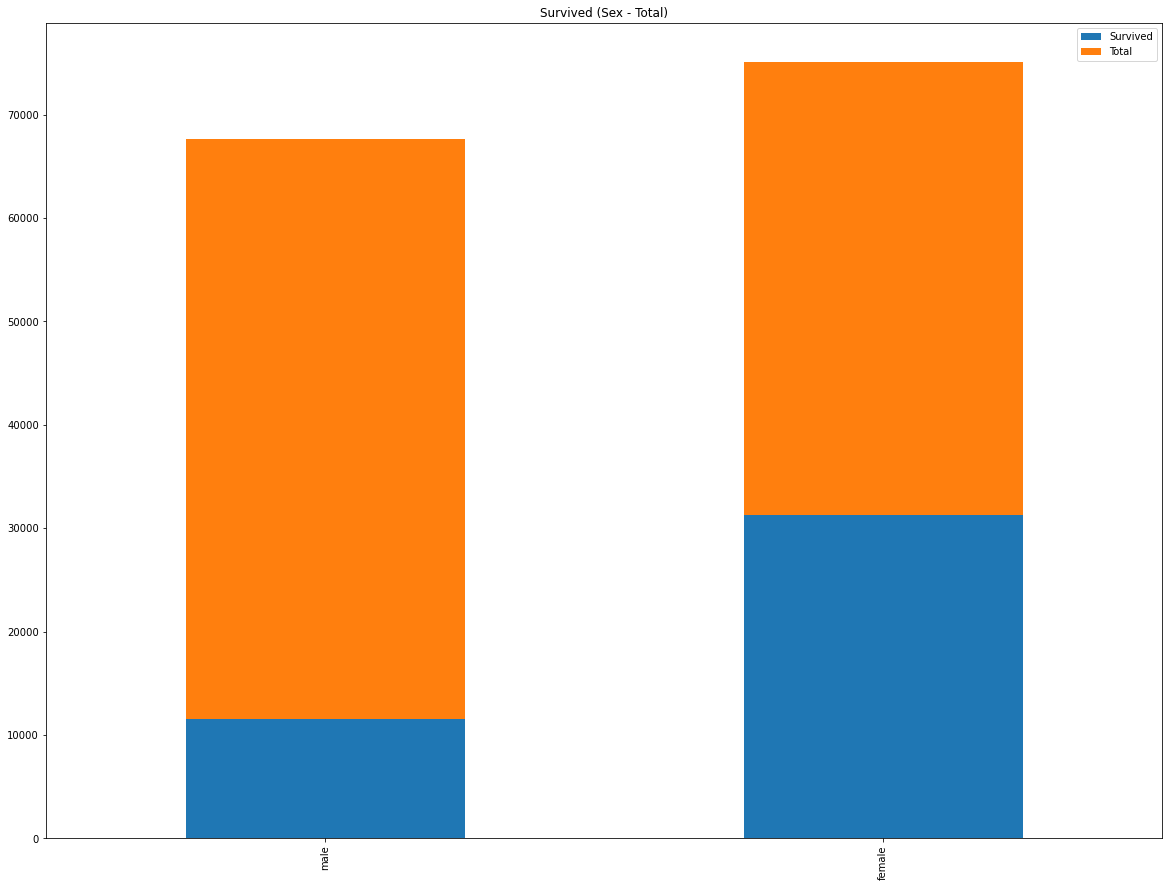

In [15]:
temp_male = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Sex'] == 'male')].Survived.sum()
temp_female = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Sex'] == 'female')].Survived.sum()



total_male = tabular_data[(tabular_data['Sex'] == 'male')]
total_male.shape[0]

total_female = tabular_data[(tabular_data['Sex'] == 'female')]
total_female.shape[0]

temp = { 'Survived': [temp_male,temp_female], 
        'Total' : [total_male.shape[0], total_female.shape[0]]}
tempDF = pd.DataFrame(data=temp, index=['male', 'female'])


tempDF.plot.bar(stacked=True, width=0.5, figsize=(20,15), title="Survived (Sex - Total)")

Как видно из графика соотношение общего количества мужчин и женщин примерно одинаково. Предположим, что из всех выживших женщин 
места на лодках предоставлялись женщинам с детьми:

<AxesSubplot:title={'center':'Survived (Women with children - Total)'}>

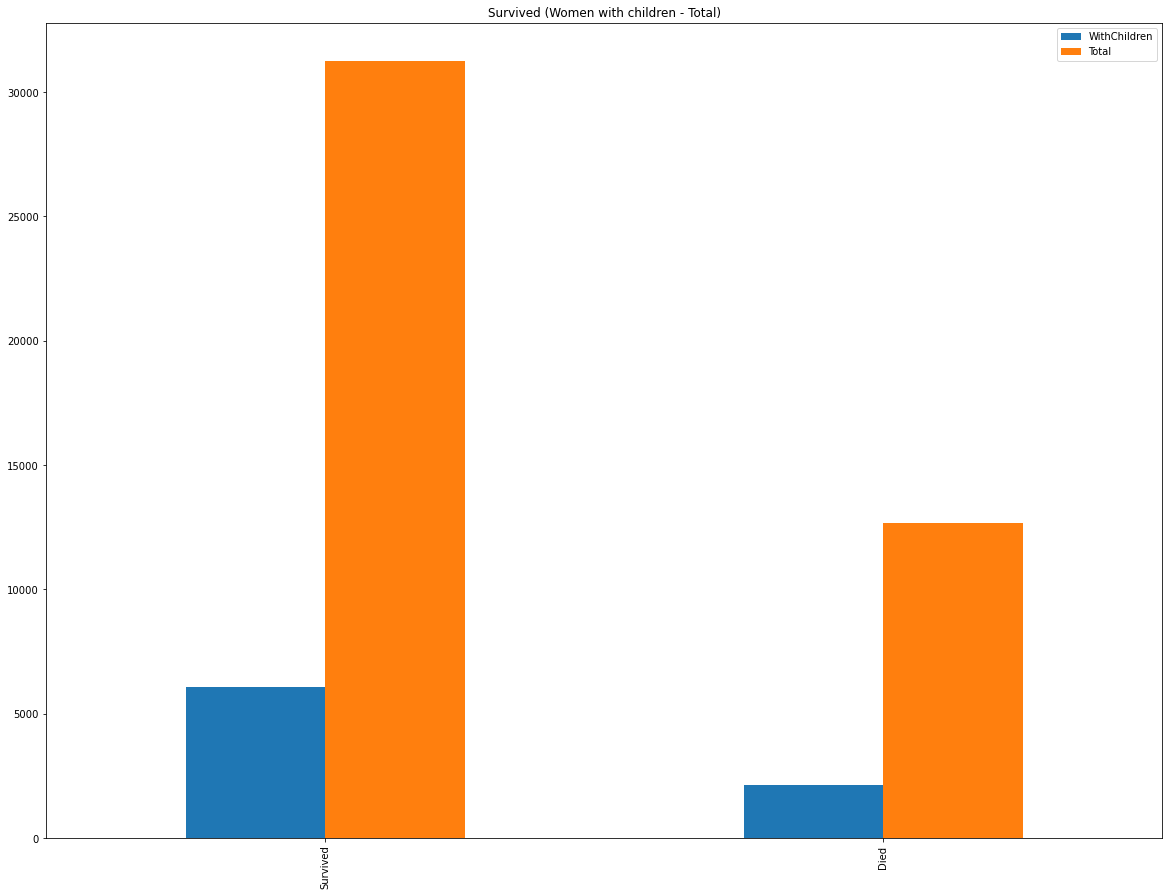

In [25]:
temp_female = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Sex'] == 'female')].Survived.sum()
temp_female_ch = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Sex'] == 'female') &
                             (tabular_data['Parch'] == 1)
                             ].Survived.sum()
temp_female_ns = tabular_data[(tabular_data['Survived'] == 0) & (tabular_data['Sex'] == 'female')].shape[0]

temp_female_ch_ns = tabular_data[(tabular_data['Survived'] == 0) & (tabular_data['Sex'] == 'female') &
                             (tabular_data['Parch'] == 1)
                             ].shape[0]

temp = { 'WithChildren': [temp_female_ch, temp_female_ch_ns], 
        'Total' : [temp_female, temp_female_ns]}
tempDF = pd.DataFrame(data=temp, index=['Survived', 'Died'])
tempDF.plot.bar(width=0.5, figsize=(20,15), title="Survived (Women with children - Total)")                           

Как видно из графика, женщин с детьми на лайнере было намного меньше чем женщин без детей. Однако прослеживается тенденция - женщина с детьми имеет больше шансов выжить, чем женщина без детей

# Вывод к 1 тезису

В критических ситуациях, в которые попало примерно одинаковое количество женщин и мужчин, большие шансы выжить имеет женщина с детьми

## Рассмотрим 2 вопрос

In [ ]:
Допустим, что наибольший шанс выживания имеют те люди, у которых стоимость билета выше(не учитывая выбросы), т.е 

Количество выживших (распределение по возрастным группам)

Распределим людей по возрастным группам, подсчитаем количество выживших

In [ ]:
under18 = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Age'] < 18)].Survived.sum()
from18To25 = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Age'] >= 18) & (tabular_data['Age'] < 25)].Survived.sum()
from25To35 = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Age'] >= 25) & (tabular_data['Age'] < 35)].Survived.sum()
from35To45 = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Age'] >= 35) & (tabular_data['Age'] < 45)].Survived.sum()
from45To55 = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Age'] >= 45) & (tabular_data['Age'] < 55)].Survived.sum()
from55To65 = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Age'] >= 55) & (tabular_data['Age'] < 65)].Survived.sum()
from65To75 = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Age'] >= 65) & (tabular_data['Age'] < 75)].Survived.sum()
over75 = tabular_data[(tabular_data['Survived'] == 1) & (tabular_data['Age'] >= 75)].Survived.sum()

temp = {'AgeGroup' : ['under18','18-25','25-35','35-45','45-55','55-65','65-70','75+'], 
        'Survived' : [under18,from18To25,from25To35,from35To45,from45To55,from55To65,from65To75,over75]}
tempDF = pd.DataFrame(data=temp)

plt.figure(figsize=(20,10))
plt.title("Survived(Age Groups)")
sns.barplot(x=tempDF['AgeGroup'] , y=tempDF['Survived'])


In [ ]:
tabular_data_group = tabular_data[tabular_data['Cabin'] == 'C12239']
tabular_data_group.head()